# Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd
import timeit
import time
import tensorflow as tf
from joblib import dump, load
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# $ \frac{a}{c} \le 1$

## No Boosting

In [10]:
d1_le1 = np.load("Test_2/data/1_RN_data_ac_le1.npy")
d1_le1.shape

(360, 4)

In [11]:
def poly_svm(train_data):
    degrees = [1,2,3,4]
    times = []
    regs = []
    for degree in degrees:
        t0 = time.time()
        reg = SVR(kernel="poly", degree = degree)
        reg.fit(train_data[:,:-1], train_data[:,-1])
        t1 = time.time()
        times.append(t1-t0)
        regs.append(reg)
        print("Done degree {}".format(degree))
    return times, regs

In [12]:
times, regs = poly_svm(d1_le1)

# saving models
i = 1
for reg in regs:
    dump(reg, 'results/d1/models/le/no_boost/le_poly_degree_{}.joblib'.format(i))
    i += 1
np.save("results/d1/times/le/no_boost/d1_times.npy", times)

Done degree 1
Done degree 2
Done degree 3
Done degree 4


In [13]:
def rbf_svm(train_data):
    t0 = time.time()
    reg = SVR(kernel="rbf")
    reg.fit(train_data[:,:-1], train_data[:,-1])
    t1 = time.time()
    return t1-t0, reg

In [14]:
times, regs = rbf_svm(d1_le1)

# saving models
dump(regs, 'results/d1/models/le/no_boost/le_rbf.joblib')
np.save("results/d1/times/le/no_boost/d1_times_rbf.npy", times)

## Boosting

In [15]:
def poly_svm_boost(train_data, M_train_data, data_type):
    degrees = [1,2,3,4]
    times = []
    M_regs = []
    g_regs = []
    for degree in degrees:
        t0 = time.time()
        reg = SVR(kernel="poly", degree = degree)
        reg.fit(M_train_data[:,:-1], M_train_data[:,-1])
        M = reg.predict(train_data[:,:2])
        train_data[:,-1] = train_data[:,-1]/M
        reg_g = SVR(kernel="poly", degree = degree)
        if data_type == 'le':
            reg_g.fit(train_data[:,1:-1], train_data[:,-1])
        elif data_type == 'g':
            reg_g.fit(train_data[:,:-1], train_data[:,-1])
        else:
            raise Exception("Invalid data type")
        t1 = time.time()
        times.append(t1-t0)
        M_regs.append(reg)
        g_regs.append(reg_g)
        print("Done degree {}".format(degree))
    
    return times, M_regs, g_regs

In [16]:
data = []
for row in d1_le1:
    if (row[2] > 1.5 and row[2] < 1.65):
        data.append(np.delete(row, 2))
M_data = np.array(data)

# Poly SVM
times, M_regs, g_regs = poly_svm_boost(d1_le1, M_data, "le")

# saving models
for i in range(4):
    dump(M_regs[i], 'results/d1/models/le/boost/le_M_poly_degree_{}.joblib'.format(i))
    dump(g_regs[i], 'results/d1/models/le/boost/le_g_poly_degree_{}.joblib'.format(i))

np.save("results/d1/times/le/boost/d1_times.npy", times)

Done degree 1
Done degree 2
Done degree 3
Done degree 4


In [17]:
def rbf_svm_boost(train_data, M_train_data, data_type):
    t0 = time.time()
    reg = SVR(kernel="rbf")
    reg.fit(M_train_data[:,:-1], M_train_data[:,-1])
    M = reg.predict(train_data[:,:2])
    train_data[:,-1] = train_data[:,-1]/M
    reg_g = SVR(kernel="rbf")
    if data_type == 'le':
        reg_g.fit(train_data[:,1:-1], train_data[:,-1])
    elif data_type == 'g':
        reg_g.fit(train_data[:,:-1], train_data[:,-1])
    else:
        raise Exception("Invalid data type")
    t1 = time.time()
    return t1-t0, reg, reg_g

In [18]:
times, M_regs, g_regs = rbf_svm_boost(d1_le1, M_data, "le")

# saving models
dump(M_regs, 'results/d1/models/le/boost/le_M_rbf.joblib')
dump(g_regs, 'results/d1/models/le/boost/le_g_rbf.joblib')
np.save("results/d1/times/le/boost/d1_times_rbf.npy", times)

# $ \frac{a}{c} > 1$

## No Boosting

In [19]:
d1_le1 = np.load("Test_2/data/1_RN_data_ac_g1.npy")
d1_le1.shape

(48, 4)

In [20]:
def poly_svm(train_data):
    degrees = [1,2,3,4]
    times = []
    regs = []
    for degree in degrees:
        t0 = time.time()
        reg = SVR(kernel="poly", degree = degree)
        reg.fit(train_data[:,:-1], train_data[:,-1])
        t1 = time.time()
        times.append(t1-t0)
        regs.append(reg)
        print("Done degree {}".format(degree))
    return times, regs

In [21]:
times, regs = poly_svm(d1_le1)

# saving models
i = 1
for reg in regs:
    dump(reg, 'results/d1/models/g/no_boost/g_poly_degree_{}.joblib'.format(i))
    i += 1
np.save("results/d1/times/g/no_boost/d1_times.npy", times)

Done degree 1
Done degree 2
Done degree 3
Done degree 4


In [22]:
def rbf_svm(train_data):
    t0 = time.time()
    reg = SVR(kernel="rbf")
    reg.fit(train_data[:,:-1], train_data[:,-1])
    t1 = time.time()
    return t1-t0, reg

In [23]:
times, regs = rbf_svm(d1_le1)

# saving models
dump(regs, 'results/d1/models/g/no_boost/g_rbf.joblib')
np.save("results/d1/times/g/no_boost/d1_times_rbf.npy", times)

## Boosting

In [24]:
def poly_svm_boost(train_data, M_train_data, data_type):
    degrees = [1,2,3,4]
    times = []
    M_regs = []
    g_regs = []
    for degree in degrees:
        t0 = time.time()
        reg = SVR(kernel="poly", degree = degree)
        reg.fit(M_train_data[:,:-1], M_train_data[:,-1])
        M = reg.predict(train_data[:,:2])
        train_data[:,-1] = train_data[:,-1]/M
        reg_g = SVR(kernel="poly", degree = degree)
        if data_type == 'le':
            reg_g.fit(train_data[:,1:-1], train_data[:,-1])
        elif data_type == 'g':
            reg_g.fit(train_data[:,:-1], train_data[:,-1])
        else:
            raise Exception("Invalid data type")
        t1 = time.time()
        times.append(t1-t0)
        M_regs.append(reg)
        g_regs.append(reg_g)
        print("Done degree {}".format(degree))
    
    return times, M_regs, g_regs

In [25]:
data = []
for row in d1_le1:
    if (row[2] > 1.5 and row[2] < 1.65):
        data.append(np.delete(row, 2))
M_data = np.array(data)

# Poly SVM
times, M_regs, g_regs = poly_svm_boost(d1_le1, M_data, "g")

# saving models
for i in range(4):
    dump(M_regs[i], 'results/d1/models/g/boost/g_M_poly_degree_{}.joblib'.format(i))
    dump(g_regs[i], 'results/d1/models/g/boost/g_g_poly_degree_{}.joblib'.format(i))

np.save("results/d1/times/g/boost/d1_times.npy", times)

Done degree 1
Done degree 2
Done degree 3
Done degree 4


In [26]:
def rbf_svm_boost(train_data, M_train_data, data_type):
    t0 = time.time()
    reg = SVR(kernel="rbf")
    reg.fit(M_train_data[:,:-1], M_train_data[:,-1])
    M = reg.predict(train_data[:,:2])
    train_data[:,-1] = train_data[:,-1]/M
    reg_g = SVR(kernel="rbf")
    if data_type == 'le':
        reg_g.fit(train_data[:,1:-1], train_data[:,-1])
    elif data_type == 'g':
        reg_g.fit(train_data[:,:-1], train_data[:,-1])
    else:
        raise Exception("Invalid data type")
    t1 = time.time()
    return t1-t0, reg, reg_g

In [27]:
times, M_regs, g_regs = rbf_svm_boost(d1_le1, M_data, "g")

# saving models
dump(M_regs, 'results/d1/models/g/boost/g_M_rbf.joblib')
dump(g_regs, 'results/d1/models/g/boost/g_g_rbf.joblib')
np.save("results/d1/times/g/boost/d1_times_rbf.npy", times)

# Results

## $0 \le \frac{a}{c} \le 2$

In [28]:
# Loading test dataset
df = pd.read_csv("../data/3_datasets_new/test/1_RN_data_TEST.csv")
df.drop(["c/b", "F"], axis=1, inplace=True)
d_test = df.to_numpy()

# Testing
MSE = []
for i in range(1, 5):
    reg = load('results/d1/models/all/d1_poly_degree_{}.joblib'.format(i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE.append(mse)
    
reg = load('results/d1/models/all/d1_rbf.joblib')
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE.append(mse)

In [59]:
# Loading test dataset
df = pd.read_csv("../data/3_datasets_new/test/2_RN_eqn_TEST.csv")
df.drop(["c/b", "F"], axis=1, inplace=True)
d_test = df.to_numpy()

# Testing
MSE_base = []
for i in range(1, 5):
    reg = load('results/d1/models/all/d1_poly_degree_{}.joblib'.format(i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_base.append(mse)
    
reg = load('results/d1/models/all/d1_rbf.joblib')
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_base.append(mse)

## $ \frac{a}{c} \le 1$

### No Boost

In [31]:
d_test = np.load("Test_2/data/test/d1_test_le.npy")

# Testing
MSE_le_nb = []
for i in range(1, 5):
    reg = load('results/d1/models/le/no_boost/le_poly_degree_{}.joblib'.format(i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_le_nb.append(mse)
    
reg = load('results/d1/models/le/no_boost/le_rbf.joblib')
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_le_nb.append(mse)

In [60]:
d_test = np.load("Test_2/data/test/d2_test_le.npy")

# Testing
MSE_le_nb_base = []
for i in range(1, 5):
    reg = load('results/d1/models/le/no_boost/le_poly_degree_{}.joblib'.format(i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_le_nb_base.append(mse)
    
reg = load('results/d1/models/le/no_boost/le_rbf.joblib')
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_le_nb_base.append(mse)

### Boost

In [32]:
d_test = np.load("Test_2/data/test/d1_test_le.npy")

# Testing
MSE_le_b = []
for i in range(4):
    reg = load('results/d1/models/le/boost/le_M_poly_degree_{}.joblib'.format(i))
    M = reg.predict(d_test[:,:2])
    reg = load('results/d1/models/le/boost/le_g_poly_degree_{}.joblib'.format(i))
    g = reg.predict(d_test[:,1:-1])
    results = M*g
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_le_b.append(mse)
    
reg = load('results/d1/models/le/boost/le_M_rbf.joblib')
M = reg.predict(d_test[:,:2])
reg = load('results/d1/models/le/boost/le_g_rbf.joblib')
g = reg.predict(d_test[:,1:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_le_b.append(mse)    

In [61]:
d_test = np.load("Test_2/data/test/d2_test_le.npy")

# Testing
MSE_le_b_base = []
for i in range(4):
    reg = load('results/d1/models/le/boost/le_M_poly_degree_{}.joblib'.format(i))
    M = reg.predict(d_test[:,:2])
    reg = load('results/d1/models/le/boost/le_g_poly_degree_{}.joblib'.format(i))
    g = reg.predict(d_test[:,1:-1])
    results = M*g
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_le_b_base.append(mse)
    
reg = load('results/d1/models/le/boost/le_M_rbf.joblib')
M = reg.predict(d_test[:,:2])
reg = load('results/d1/models/le/boost/le_g_rbf.joblib')
g = reg.predict(d_test[:,1:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_le_b_base.append(mse)   

## $ \frac{a}{c} > 1$

### No Boost

In [33]:
d_test = np.load("Test_2/data/test/d1_test_g.npy")

# Testing
MSE_g_nb = []
for i in range(1, 5):
    reg = load('results/d1/models/g/no_boost/g_poly_degree_{}.joblib'.format(i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_g_nb.append(mse)
    
reg = load('results/d1/models/g/no_boost/g_rbf.joblib')
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_g_nb.append(mse)

In [62]:
d_test = np.load("Test_2/data/test/d2_test_g.npy")

# Testing
MSE_g_nb_base = []
for i in range(1, 5):
    reg = load('results/d1/models/g/no_boost/g_poly_degree_{}.joblib'.format(i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_g_nb_base.append(mse)
    
reg = load('results/d1/models/g/no_boost/g_rbf.joblib')
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_g_nb_base.append(mse)

### Boost

In [36]:
d_test = np.load("Test_2/data/test/d1_test_g.npy")

# Testing
MSE_g_b = []
for i in range(4):
    reg = load('results/d1/models/g/boost/g_M_poly_degree_{}.joblib'.format(i))
    M = reg.predict(d_test[:,:2])
    reg = load('results/d1/models/g/boost/g_g_poly_degree_{}.joblib'.format(i))
    g = reg.predict(d_test[:,:-1])
    results = M*g
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_g_b.append(mse)
    
reg = load('results/d1/models/g/boost/g_M_rbf.joblib')
M = reg.predict(d_test[:,:2])
reg = load('results/d1/models/g/boost/g_g_rbf.joblib')
g = reg.predict(d_test[:,:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_g_b.append(mse)    

In [63]:
d_test = np.load("Test_2/data/test/d2_test_g.npy")

# Testing
MSE_g_b_base = []
for i in range(4):
    reg = load('results/d1/models/g/boost/g_M_poly_degree_{}.joblib'.format(i))
    M = reg.predict(d_test[:,:2])
    reg = load('results/d1/models/g/boost/g_g_poly_degree_{}.joblib'.format(i))
    g = reg.predict(d_test[:,:-1])
    results = M*g
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_g_b_base.append(mse)
    
reg = load('results/d1/models/g/boost/g_M_rbf.joblib')
M = reg.predict(d_test[:,:2])
reg = load('results/d1/models/g/boost/g_g_rbf.joblib')
g = reg.predict(d_test[:,:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_g_b_base.append(mse) 

## Plot

#### Test dataset

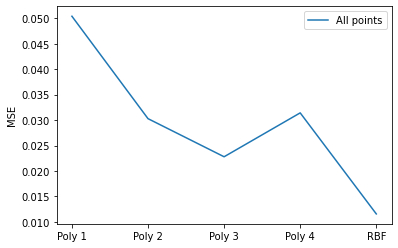

In [52]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF"]
plt.plot(algos, MSE, label="All points")
plt.ylabel("MSE")
plt.legend()

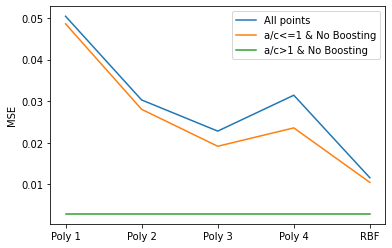

In [55]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF"]
plt.plot(algos, MSE, label="All points")
plt.plot(algos, MSE_le_nb, label="a/c<=1 & No Boosting")
plt.plot(algos, MSE_g_nb, label="a/c>1 & No Boosting")
plt.ylabel("MSE")
plt.legend()

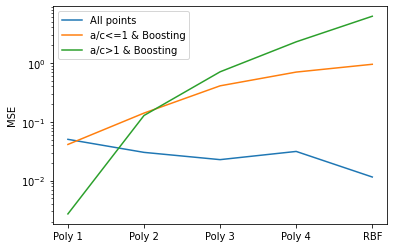

In [57]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF"]
plt.plot(algos, MSE, label="All points")
plt.plot(algos, MSE_le_b, label="a/c<=1 & Boosting")
plt.plot(algos, MSE_g_b, label="a/c>1 & Boosting")
plt.ylabel("MSE")
plt.semilogy()
plt.legend()

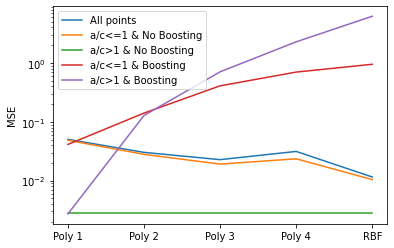

In [58]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF"]
plt.plot(algos, MSE, label="All points")
plt.plot(algos, MSE_le_nb, label="a/c<=1 & No Boosting")
plt.plot(algos, MSE_g_nb, label="a/c>1 & No Boosting")
plt.plot(algos, MSE_le_b, label="a/c<=1 & Boosting")
plt.plot(algos, MSE_g_b, label="a/c>1 & Boosting")
plt.ylabel("MSE")
plt.semilogy()
plt.legend()

#### Baseline

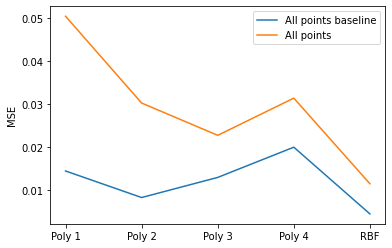

In [68]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF"]
plt.plot(algos, MSE_base, label="All points baseline")
plt.plot(algos, MSE, label="All points")
plt.ylabel("MSE")
plt.legend()

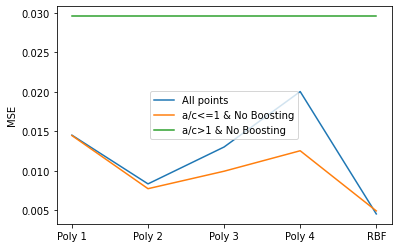

In [65]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF"]
plt.plot(algos, MSE_base, label="All points")
plt.plot(algos, MSE_le_nb_base, label="a/c<=1 & No Boosting")
plt.plot(algos, MSE_g_nb_base, label="a/c>1 & No Boosting")
plt.ylabel("MSE")
plt.legend()

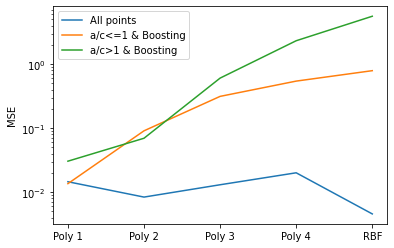

In [66]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF"]
plt.plot(algos, MSE_base, label="All points")
plt.plot(algos, MSE_le_b_base, label="a/c<=1 & Boosting")
plt.plot(algos, MSE_g_b_base, label="a/c>1 & Boosting")
plt.ylabel("MSE")
plt.semilogy()
plt.legend()

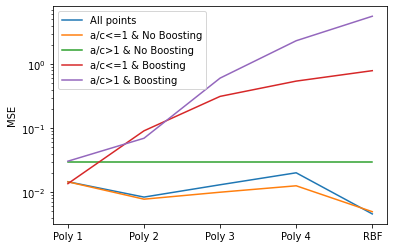

In [67]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF"]
plt.plot(algos, MSE_base, label="All points")
plt.plot(algos, MSE_le_nb_base, label="a/c<=1 & No Boosting")
plt.plot(algos, MSE_g_nb_base, label="a/c>1 & No Boosting")
plt.plot(algos, MSE_le_b_base, label="a/c<=1 & Boosting")
plt.plot(algos, MSE_g_b_base, label="a/c>1 & Boosting")
plt.ylabel("MSE")
plt.semilogy()
plt.legend()